In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from numpy import argmax
from sklearn.datasets import fetch_20newsgroups

## Label & Hot Encode

In [15]:
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(values.reshape(-1, 1))
print(onehot_encoded)

# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

# invert first example
inverted = onehot_encoder.inverse_transform([(onehot_encoded[2, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']
[['warm']]


## KBinsDiscretizer

In [16]:
df = pd.merge(pd.read_csv('train.csv'), pd.read_csv('test.csv'), how='outer')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
from sklearn.preprocessing import KBinsDiscretizer

age = np.array(df.Age.dropna())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
est_fited = est.fit_transform(np.reshape(age,(-1,1)))

(array([ 99.,  97.,  94., 119.,  95., 107., 113., 109., 103., 110.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

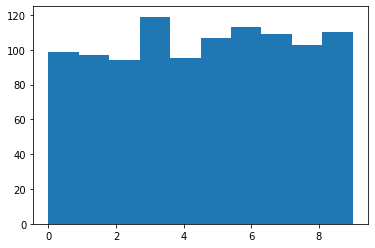

In [19]:
plt.hist(est_fited)

In [20]:
df_age = df[['Age']].dropna().copy()
df_age['Age_Bin'] = est_fited
df_age.head(10)

,Age,Age_Bin
0,22.0,3.0
1,38.0,7.0
2,26.0,4.0
3,35.0,6.0
4,35.0,6.0
6,54.0,9.0
7,2.0,0.0
8,27.0,4.0
9,14.0,1.0
10,4.0,0.0


In [21]:
df_age.Age_Bin.unique()

array([3., 7., 4., 6., 9., 0., 1., 2., 5., 8.])

In [22]:
df_age.groupby('Age_Bin').count()

,Age
Age_Bin,
0.0,99
1.0,97
2.0,94
3.0,119
4.0,95
5.0,107
6.0,113
7.0,109
8.0,103


## Binarizer

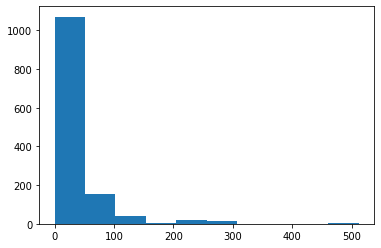

In [23]:
from sklearn.preprocessing import Binarizer

fare =df.Fare.dropna()
plt.hist(fare)
plt.show()

In [24]:
binary = Binarizer(threshold=200)
fare_binary = binary.fit_transform(np.array(fare).reshape(-1,1))
fare_binary

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [25]:
df_fare = df[['Fare']].dropna().copy()
df_fare['Fare_Bin'] = fare_binary
df_fare.sort_values(by='Fare')

,Fare,Fare_Bin
732,0.0000,0.0
413,0.0000,0.0
806,0.0000,0.0
1157,0.0000,0.0
633,0.0000,0.0
...,...,...
438,263.0000,1.0
679,512.3292,1.0
737,512.3292,1.0
258,512.3292,1.0


In [26]:
df_fare[df_fare.Fare <=200].Fare_Bin.unique()

array([0.])

In [27]:
df_fare[df_fare.Fare >200].Fare_Bin.unique()

array([1.])

## Pipe Line

In [28]:
fifa = pd.read_csv("fifa.csv")
fifa.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [29]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [30]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

In [31]:
numerical_features = fifa.select_dtypes(['float64','int64']).columns
numerical_features = numerical_features[2:]
numerical_features

Index(['Age', 'Overall', 'Potential', 'Special', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Jersey Number', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [32]:
int_flot_pipe = make_pipeline(SimpleImputer(strategy="median"),
                              StandardScaler()
                          )

In [33]:
ct = make_column_transformer((int_flot_pipe,numerical_features))
make_pipe = ct.fit(fifa)
pd.DataFrame(data=make_pipe.transform(fifa),columns=numerical_features).head(3)

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,1.258678,4.018287,3.698092,2.216573,9.877133,1.595825,2.170641,-0.599038,1.867640,2.535341,...,1.686561,3.270147,-0.719159,-0.911222,-0.925466,-0.599836,-0.318445,-0.073911,-0.139573,-0.484898
1,1.686961,4.018287,3.698092,2.311958,9.877133,1.595825,3.494491,-0.787460,1.867640,2.484060,...,2.324197,3.182588,-0.970671,-0.772577,-1.066557,-0.543255,-0.318445,-0.073911,-0.139573,-0.317611
2,0.187972,3.728799,3.535128,2.000121,9.877133,3.111958,3.494491,-0.599038,1.595028,2.125092,...,2.069143,3.095030,-1.020973,-1.096081,-0.596255,-0.430094,-0.436883,-0.073911,-0.080798,-0.317611


In [34]:
dummy_player = fifa.sample(1)
dummy_player

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
9037,9037,224826,G. Berthier,22,https://cdn.sofifa.org/players/4/19/224826.png,France,https://cdn.sofifa.org/flags/18.png,66,75,Red Star FC,...,57.0,33.0,23.0,26.0,10.0,10.0,10.0,14.0,6.0,NaN


In [35]:
pd.DataFrame(data=make_pipe.transform(dummy_player),columns=numerical_features).head(3)

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,-0.668593,-0.03455,0.601777,0.136438,-0.286941,-1.436442,0.846792,-0.347809,0.722671,0.689219,...,0.666343,-0.144632,-0.719159,-1.142296,-0.925466,-0.373513,-0.377664,-0.377257,-0.139573,-0.596422


## IQR Outlier

In [36]:
wine_df = pd.read_csv('wine-data.csv')
wine_df.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [37]:
wine_df.price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [38]:
price = wine_df.price
Q1= (price.quantile(0.25))
Q3 = (price.quantile(0.75))
IQR = (Q3 - Q1)
down = ((Q1 - 1.5*IQR))
up =  ((Q3 + 1.5*IQR))
print(Q1)
print(Q3)
print(IQR)
print(down)
print(up)

17.0
42.0
25.0
-20.5
79.5


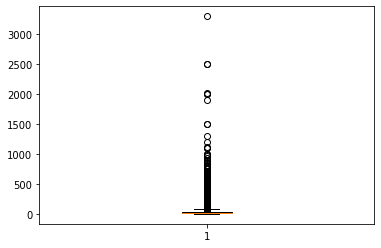

In [39]:
plt.boxplot(price.dropna())
plt.show()

In [40]:
price[(price < down)].shape

(0,)

In [41]:
price[(price > up)].shape

(7241,)

In [42]:
price.shape[0]

129971

In [43]:
(price[(price < down)].shape[0] + price[(price > up)].shape[0])/price.shape[0] *100

5.571242815705042

## Texto

In [44]:
desc_wine = wine_df.description
desc_wine 

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [46]:
cvec = CountVectorizer()
count= cvec.fit_transform(desc_wine)
count

<129971x31275 sparse matrix of type '<class 'numpy.int64'>'
	with 4475479 stored elements in Compressed Sparse Row format>

In [47]:
cvec.get_feature_names()

['000',
 '008',
 '01',
 '02',
 '03',
 '030',
 '035',
 '04',
 '04s',
 '05',
 '056',
 '05s',
 '06',
 '061',
 '064',
 '06s',
 '07',
 '07s',
 '08',
 '080',
 '08s',
 '09',
 '093',
 '09s',
 '10',
 '100',
 '1000',
 '100g',
 '100ml',
 '100th',
 '101',
 '1016',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107th',
 '108',
 '10g',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '114',
 '115',
 '116',
 '1194',
 '11th',
 '12',
 '120',
 '1200',
 '122',
 '123',
 '125',
 '1252',
 '126',
 '128',
 '1290',
 '12g',
 '12th',
 '13',
 '130',
 '130th',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '1375',
 '1396',
 '13g',
 '13th',
 '14',
 '140',
 '1429',
 '146',
 '147',
 '148',
 '1492',
 '14g',
 '14th',
 '15',
 '150',
 '1500',
 '1500s',
 '150th',
 '152',
 '153',
 '154',
 '155g',
 '159g',
 '15g',
 '15s',
 '15th',
 '16',
 '160',
 '1600',
 '1607',
 '160g',
 '161',
 '1610',
 '1628',
 '164',
 '1649',
 '165',
 '1667',
 '1674',
 '1690',
 '1692',
 '16g',
 '16th',
 '17',
 '170',
 '1700s',
 '1705',
 '170g',
 '171',
 '172',
 '

In [48]:
count.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [49]:
df_vec = pd.DataFrame(count.todense(), columns=cvec.get_feature_names())

In [75]:
list(df_vec.columns)

['000',
 '008',
 '01',
 '02',
 '03',
 '030',
 '035',
 '04',
 '04s',
 '05',
 '056',
 '05s',
 '06',
 '061',
 '064',
 '06s',
 '07',
 '07s',
 '08',
 '080',
 '08s',
 '09',
 '093',
 '09s',
 '10',
 '100',
 '1000',
 '100g',
 '100ml',
 '100th',
 '101',
 '1016',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107th',
 '108',
 '10g',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '114',
 '115',
 '116',
 '1194',
 '11th',
 '12',
 '120',
 '1200',
 '122',
 '123',
 '125',
 '1252',
 '126',
 '128',
 '1290',
 '12g',
 '12th',
 '13',
 '130',
 '130th',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '1375',
 '1396',
 '13g',
 '13th',
 '14',
 '140',
 '1429',
 '146',
 '147',
 '148',
 '1492',
 '14g',
 '14th',
 '15',
 '150',
 '1500',
 '1500s',
 '150th',
 '152',
 '153',
 '154',
 '155g',
 '159g',
 '15g',
 '15s',
 '15th',
 '16',
 '160',
 '1600',
 '1607',
 '160g',
 '161',
 '1610',
 '1628',
 '164',
 '1649',
 '165',
 '1667',
 '1674',
 '1690',
 '1692',
 '16g',
 '16th',
 '17',
 '170',
 '1700s',
 '1705',
 '170g',
 '171',
 '172',
 '

In [51]:
df_vec.sum().to_frame().loc['adults']

0    2
Name: adults, dtype: int64

In [52]:
tf = TfidfVectorizer()
freq= tf.fit_transform(desc_wine)
freq

<129971x31275 sparse matrix of type '<class 'numpy.float64'>'
	with 4475479 stored elements in Compressed Sparse Row format>

In [53]:
df_tf = pd.DataFrame(freq.todense(), columns=tf.get_feature_names())

In [54]:
df_tf.columns

Index(['000', '008', '01', '02', '03', '030', '035', '04', '04s', '05',
       ...
       'émilion', 'étoile', 'été', 'öküzgözü', 'über', 'überaromatic',
       'überbest', 'ürzig', 'ürziger', 'žilavka'],
      dtype='object', length=31275)

In [55]:
df_tf.sum().to_frame().loc['adults']

0    0.480071
Name: adults, dtype: float64

In [56]:
pd.DataFrame(tf.idf_,index=tf.get_feature_names()).loc['adults']

0    11.676462
Name: adults, dtype: float64

In [57]:
tf.get_feature_names()

['000',
 '008',
 '01',
 '02',
 '03',
 '030',
 '035',
 '04',
 '04s',
 '05',
 '056',
 '05s',
 '06',
 '061',
 '064',
 '06s',
 '07',
 '07s',
 '08',
 '080',
 '08s',
 '09',
 '093',
 '09s',
 '10',
 '100',
 '1000',
 '100g',
 '100ml',
 '100th',
 '101',
 '1016',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107th',
 '108',
 '10g',
 '10th',
 '11',
 '110',
 '111',
 '112',
 '114',
 '115',
 '116',
 '1194',
 '11th',
 '12',
 '120',
 '1200',
 '122',
 '123',
 '125',
 '1252',
 '126',
 '128',
 '1290',
 '12g',
 '12th',
 '13',
 '130',
 '130th',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '1375',
 '1396',
 '13g',
 '13th',
 '14',
 '140',
 '1429',
 '146',
 '147',
 '148',
 '1492',
 '14g',
 '14th',
 '15',
 '150',
 '1500',
 '1500s',
 '150th',
 '152',
 '153',
 '154',
 '155g',
 '159g',
 '15g',
 '15s',
 '15th',
 '16',
 '160',
 '1600',
 '1607',
 '160g',
 '161',
 '1610',
 '1628',
 '164',
 '1649',
 '165',
 '1667',
 '1674',
 '1690',
 '1692',
 '16g',
 '16th',
 '17',
 '170',
 '1700s',
 '1705',
 '170g',
 '171',
 '172',
 '

## Dateset do sklearn

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [8]:
cvec = CountVectorizer()
wm = cvec.fit_transform(newsgroup.data)
tokens = cvec.get_feature_names()
people_index =  cvec.get_feature_names().index("people")
people_on_corpus = wm.toarray().sum(axis=0)[people_index]
people_on_corpus

264

In [9]:
tf = TfidfVectorizer()
wm = tf.fit_transform(newsgroup.data)
tokens = cvec.get_feature_names()
people_index =  cvec.get_feature_names().index("people")
people_on_corpus = wm.toarray().sum(axis=0)[people_index]
people_on_corpus

8.869171867054558

In [64]:
desc_wine[0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
cv.fit_transform(desc_wine).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
len(cv.get_feature_names())

611688

In [80]:
list(cv.get_feature_names())[-9999]

'with whiff'